In [43]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.0.0-rc1


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [45]:
#Computer vision is the field of having a computer 
#understand and label what is present in an image

<b>Callbacks</b>
<p>we can use the callbacks to evaluate every epoch we run and when we get to the threshhold we want , the training will stop

In [46]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
       print("\nReached 60% accuracy so cancelling training!")
       self.model.stop_training=True

In [47]:
#instantiate the class that I just called
callbacks=myCallback()

In [48]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data()

Fashion MNIST /70k images/
20 categories /
images are 28 x 28 pixels


In [49]:
#shape of the train images
train_images.shape

(60000, 28, 28)

In [50]:
#each pixel can be represented in values from zero to 255
#it's only one byte per pixel
#28 x 28 pixels
##784 bytes

In [51]:
#fashion mnist is available as a dataset with an API call in Tensor flow

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

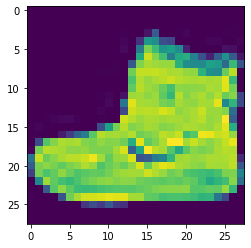

In [52]:
np.set_printoptions(linewidth=200)
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

In [53]:
#You'll notice that all of the values in the number are between 0 and 255. 
#If we are training a neural network, for various reasons it's easier if we 
#treat all values as between 0 and 1, a process called 'normalizing'...and 
#fortunately in Python it's easy to normalize a list like this without looping.
# You do it like this:

In [54]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

Below after normalizing, verifying that the numbers are between zero and one

1
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.68627451 0.46666667 0.44705882 0.3372549  0.34901961 0.38823529 0.42745098
  0.51764706 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.36078431 1.         0.99607843 1.         1.         1.         1.         0.98039216
  1.         0.0745098  0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.82745098 0.91764706 0.82352941 0.85882353 0.8627451  0.84313725 0.82352941 0.80784314
  1.         0.46666667 0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.

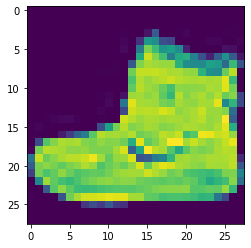

In [55]:
np.set_printoptions(linewidth=200)
plt.imshow(train_images[0])
print(train_labels[80])
print(train_images[80])

In [56]:
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ]) 

In [57]:
 #Flatten takes this 28 by 28 square and turns it into a simple linear array. 

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


In [58]:
#middle layer=hidden layer
#You can also tune the neural network by adding,
# removing and changing layer size to see the impact

In [59]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
59520/60000 [============================>.] - ETA: 0s - loss: 0.4966 - accuracy: 0.8248
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 6s 92us/sample - loss: 0.4962 - accuracy: 0.8251


In [60]:
#testing with the test images

In [ ]:
model.evaluate(test_images, test_labels)

In [64]:
# this is the output for the previous code. I cleared it because it was creating a 
#very long exection on my github
[0.4488698311805725, 0.8388]

[0.4488698311805725, 0.8388]

In [62]:
# input layer is in the shape of the data
#output layer is in the shape of the classes
#hidden layer tries to figure out the roles between them

In [63]:
#loss function and optimizer
#----To make a guess of the r/ship btwn input data and output data
#Loss function-measure how well or badly it did
#Optimizer-To generate a new guess and repeat
